# Prototype

In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib
import os

In [6]:
# 2. Load dataset
df = pd.read_csv("../data/fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


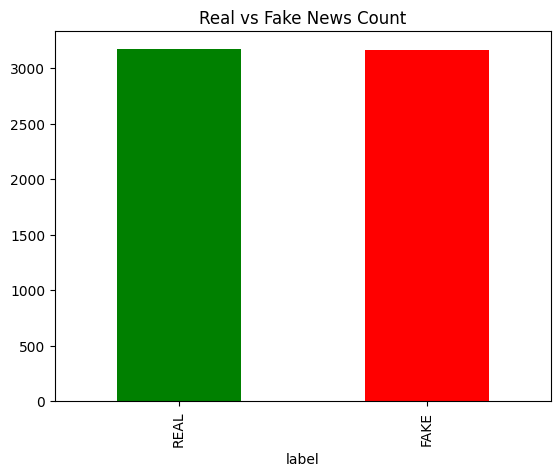

In [7]:
# 3. Check class distribution
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Real vs Fake News Count")
plt.show()


In [ ]:
# 4. Prepare features and labels
X = df['text']
y = df['label']

# X = df['title'] + " " + df['text']


In [9]:
# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
# 6. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
# 7. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [12]:
# 8. Make predictions
y_pred = model.predict(X_test_vec)

Accuracy: 0.9155485398579322

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       628
        REAL       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



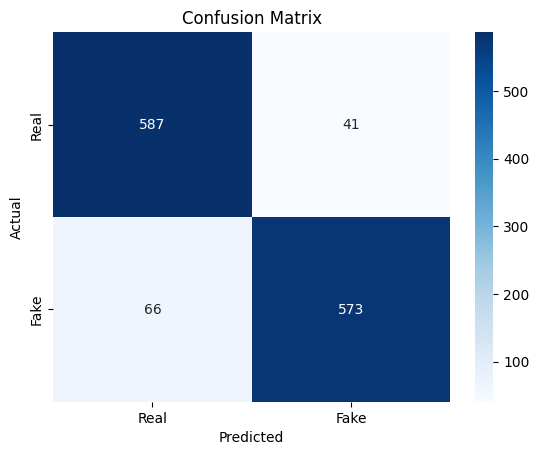

In [13]:
# 9. Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# 10. Save the model and vectorizer
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/model.pkl")
joblib.dump(vectorizer, "models/vectorizer.pkl")


['models/vectorizer.pkl']

In [15]:
# 11. Test with a sample news
sample = "Government declares new policy for economic growth"
sample_vec = vectorizer.transform([sample])
print("Prediction:", model.predict(sample_vec)[0])


Prediction: FAKE
